In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint

We're analysing a model of dark matter freeze-out where the only reaction that changes dark matter abundance is self-annihilation. Dark matter is a Majorana fermion.
That way, we can write Boltzmann Equation as:
dY/dx = (-lambda/x^2) (Y^2 - Y_eq^2), with lambda = m_x^3 <sigma v>/H(m_x)
As it is done in Dodelson, chapter 4. We consider two possibilities: one where <sigma v> (and therefore lambda) doesn't
depend on the temperature, and one where it does.
We also use a self-made integration function with variable step size, for stiff equations, using Euler's Method of numerical explicit integration.

In [13]:
#self-made integration function with variable step size, for stiff equations, using Euler's Method for 
#explicit numerical integration. f is the function to integrate, xi and xf are the integration limits,
#nmax is the number of iterations, y0 is the value of the function in x[0].
#hmax is the inicial step size, that can be reduced depending on how stiff is
#the section being integrated. rtol is the relative tolerance. *args are the arguments for the function being integrated
def integration(f,xi,xf, nmax,y0, hmax,rtol, *args):
    Y = np.zeros(nmax)
    x = np.zeros(nmax)
    x[0] = xi
    Y[0] = y0
    k = 0
    h = hmax
    while k< (nmax-1) and xf >=x[k]:
        h = hmax
        dYmax= rtol* Y[k]
        dYdx = f(Y[k], x[k], *args)
        deltaY = dYdx*h
        if (abs(deltaY) >= dYmax):
            h = hmax * (dYmax/deltaY)
            deltaY = dYdx*h
            
        x [k+1] = x[k] + h
        Y[k+1]= Y[k]+ deltaY
        if k == (nmax-1):
            print("Max number of iterations achieved in:", x[k])
        k = k + 1
    return x[:k], Y[:k]

In [23]:
#boltzmann equation for this model.
def dY(Y, x,constant,m, mi, g):
    T = m / x #comes from x = m/T
    exp = np.exp((-m+mi)/T)
    yEQ = (g * exp * (((m*T)/(2*np.pi))**(3/2)))/(T**3)
    lambd = constant
    dYdx = -(lambd/x**2) * ((Y**2)-(yEQ**2))
    return dYdx

In [24]:
#function that calculates dark matter yield at x[0], considering it is in equilibrium with plasma
def yinitial(Ti, m, mi, g):
    exp = np.exp((-m+mi)/Ti)
    power = ((m*Ti)/(2*np.pi))**(3/2)
    y0 = (g * exp * power)/(Ti**3)
    return y0

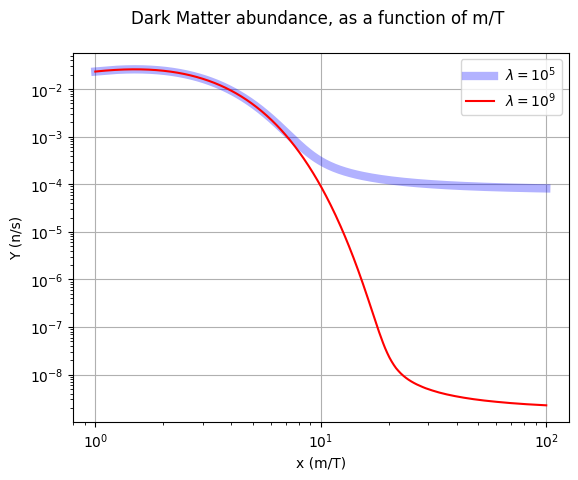

In [31]:
#using odeint to integrate, for <sigma v> independent of temperature
#model's parameters
m = 1000 #dark matter particle's mass, in GeV
mi = 0 #chemical potential
g = 1 #freedom degrees
T = np.linspace(1000, 10, 900) #temperature, in GeV

x = m / T
y0 = yinitial(T[0],m, mi, g)
Y1 = odeint(dY, y0, x, args=(1e5,m, mi, g))
Y2 = odeint(dY, y0, x, args=(10e9, m, mi, g), atol = (10**-10), rtol=(10**-10))
plt.plot(x,Y1, "b",linestyle="-",alpha=0.3, linewidth=6, label=r'$\lambda = 10^5$')
plt.plot(x,Y2,"r", label=r'$\lambda = 10^9$')
plt.title('Dark Matter abundance, as a function of m/T \n')
plt.xlabel('x (m/T)')
plt.ylabel('Y (n/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

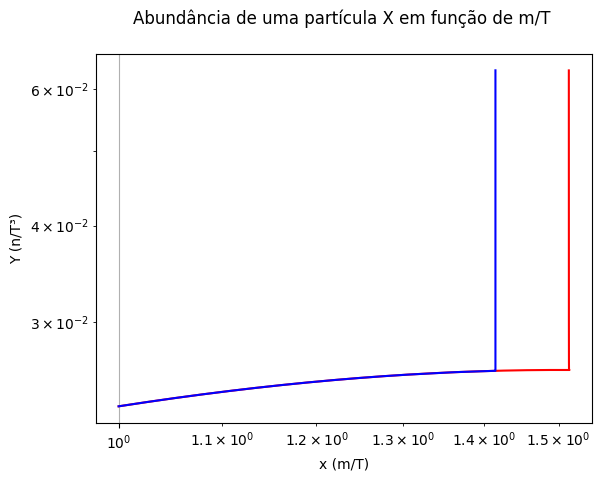

In [34]:
#using self-made function for integration, for a model with <sigma v> independent of temperature
#model's parameters
m = 1000 #dark matter mass in GeV
mu = 0 #chemical potential
g = 1 #degrees of freedom
h = 10e-6 #step size
nmax = 10000000 #maximum number of iterations
Ti = 1000 #initial temperature
Tf = 10 #final temperature
xi = m / Ti
xf = m / Tf
rtol = 0.00001 


y0 = yinitial(Ti,m, mu, g)
args = np.array([10e5,m, mu, g], dtype=object)
xsol, ysol = integration(dY, xi, xf, nmax, y0, h,rtol, *args)
plt.plot(xsol,ysol ,'r')
plt.title('Abundância de uma partícula X em função de m/T \n')
plt.xlabel('x (m/T)')
plt.ylabel('Y (n/T³)')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

In [35]:
#boltzmann equation for this model.
def dY2(Y, x,constant,m, mi, g):
    T = m / x #comes from x = m/T
    exp = np.exp((-m+mi)/T)
    yEQ = (g * exp * (((m*T)/(2*np.pi))**(3/2)))/(T**3)
    lambd = constant * T
    dYdx = -(lambd/x**2) * ((Y**2)-(yEQ**2))
    return dYdx

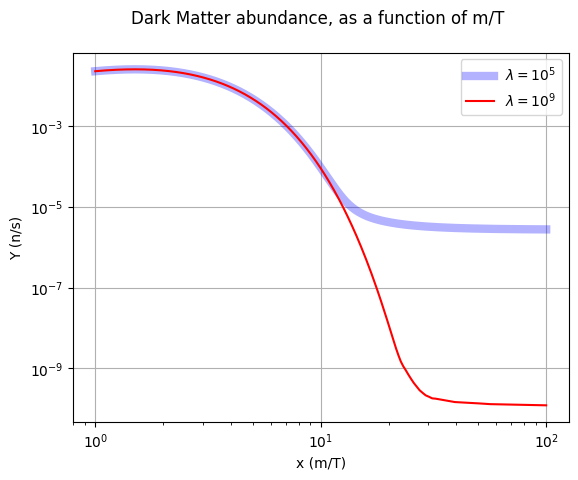

In [37]:
#using odeint to integrate, for <sigma v> dependent of temperature
#model's parameters
m = 1000 #dark matter particle's mass, in GeV
mi = 0 #chemical potential
g = 1 #freedom degrees
T = np.linspace(1000, 10, 900) #temperature, in GeV

x = m / T
y0 = yinitial(T[0],m, mi, g)
Y1 = odeint(dY2, y0, x, args=(1e5,m, mi, g))
Y2 = odeint(dY2, y0, x, args=(10e9, m, mi, g), atol = (10**-10), rtol=(10**-20))
plt.plot(x,Y1, "b",linestyle="-",alpha=0.3, linewidth=6, label=r'$\lambda = 10^5$')
plt.plot(x,Y2,"r", label=r'$\lambda = 10^9$')
plt.title('Dark Matter abundance, as a function of m/T \n')
plt.xlabel('x (m/T)')
plt.ylabel('Y (n/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()